In [1]:
import numpy as np
from pyprojroot.here import here
import pandas as pd
from pyarrow import feather
import janitor
from janitor import clean_names

groups = {
  "populacao": ["densidade_populacional", "populacao_residente"],
  "setor": [["setor_primario", "setor_secundario", "setor_terciario"], ["perc_prim", "perc_sec"]],
  "causas": ["classe_da_causa_6", "causa_do_incidente", "classe_da_causa_4"],
  "direcao do vento" : [["dd_med", "dd_ffx"], ["dd_med_sin", "dd_med_cos", "dd_ffx_sin", "dd_ffx_cos"]],
}
variables_to_not_use = ["codigo_do_relatorio", "distrito", "perc_terc"]

# EventosFinalCompleto.feather
eventos_completo = feather.read_feather(here("data/EventosFinalCompleto.feather"))
# EventosApeans.feather
eventos = feather.read_feather(here("data/EventosApeans.feather"))
# DiariosApeans.feather
diarios = feather.read_feather(here("data/DiariosApeans.feather"))
eventos

,codigo_do_relatorio,concelho,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,...,sen_mes,cos_mes,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd
0,EDPD_2018_JAN_T_1,ALMADA,2018-01-02,MT,Escavações,55,828,0.002935,0.000044,0.002456,...,0.207912,0.978148,10.70,17.40,2.600,278.25,289.50,2.0,7.800,0.000000
1,EDPD_2018_JAN_T_2,SERTA,2018-01-02,MT,Abate De Árvores,163,549,0.002933,0.000177,0.016501,...,0.207912,0.978148,10.60,13.80,6.200,249.00,270.00,2.8,8.100,0.000000
2,EDPD_2018_JAN_T_3,FELGUEIRAS,2018-01-04,MT,Deslizamento De Terras,596,3459,0.019228,0.000266,0.035905,...,0.207912,0.978148,14.00,14.80,12.900,197.00,180.00,3.9,14.400,4.000000
3,EDPD_2018_JAN_T_4,TORRES VEDRAS,2018-01-05,BT,Veículos,178,102,0.000000,0.000000,0.000000,...,0.207912,0.978148,12.40,15.10,9.100,288.00,225.00,3.6,13.900,13.200000
4,EDPD_2018_JAN_T_5,NISA,2018-01-09,MT,Aves,119,1731,0.004422,0.000155,0.010038,...,0.207912,0.978148,4.90,7.80,2.200,137.00,118.00,4.1,15.400,15.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,EDPD_2020_DEZ_T_21,POMBAL,2020-12-24,MT,Abate De Árvores,139,2517,0.005941,0.000461,0.017245,...,0.587785,-0.809017,7.90,12.20,2.100,7.00,351.00,1.7,7.600,0.000000
2918,EDPD_2020_DEZ_T_22,VILA NOVA DE GAIA,2020-12-30,MT,Aves,81,3641,0.011914,0.000290,0.011131,...,0.587785,-0.809017,4.45,9.05,0.275,239.00,186.25,1.5,4.825,0.787500
2919,EDPD_2020_DEZ_T_23,ALBUFEIRA,2020-12-28,MT,Escavações,81,3175,0.005974,0.000086,0.005940,...,0.587785,-0.809017,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000
2920,EDPD_2020_DEZ_T_24,CASTRO MARIM,2020-12-28,MT,Veículos,239,591,0.006928,0.000054,0.011528,...,0.587785,-0.809017,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000


In [2]:
from grafo import transform_concelhos
diarios["concelho"] = diarios["concelho"].apply(transform_concelhos)
diarios["distrito"] = diarios["distrito"].apply(transform_concelhos)
eventos_completo["concelho"] = eventos_completo["concelho"].apply(transform_concelhos)
eventos_completo["distrito"] = eventos_completo["concelho"].apply(transform_concelhos)
eventos["concelho"] = eventos["concelho"].apply(transform_concelhos)
eventos["distrito"] = eventos["distrito"].apply(transform_concelhos)
diarios.concelho.unique()

Cannot find header.dxf (GDAL_DATA is not defined)


0it [00:00, ?it/s]

array(['ALMADA', 'SERTA', 'FELGUEIRAS', 'TORRESVEDRAS', 'NISA',
       'ESPOSENDE', 'IDANHAANOVA', 'ARRAIOLOS', 'AMARANTE', 'SETUBAL',
       'LAMEGO', 'AGUEDA', 'OVAR', 'ESPINHO', 'LAGOS', 'VILAVICOSA',
       'SABUGAL', 'CELORICODABEIRA', 'MEDA', 'VISEU', 'RIOMAIOR',
       'MARCODECANAVESES', 'VOUZELA', 'MONTEMORONOVO',
       'VILANOVADECERVEIRA', 'GONDOMAR', 'MIRANDELA', 'SATAO', 'TONDELA',
       'VIEIRADOMINHO', 'MONTALEGRE', 'VILAREAL', 'OLIVEIRADOBAIRRO',
       'VILANOVADEFAMALICAO', 'ESTARREJA', 'LEIRIA', 'AMADORA', 'LISBOA',
       'PENACOVA', 'BARCELOS', 'REDONDO', 'AVIS', 'CADAVAL',
       'PONTEDABARCA', 'PONTEDELIMA', 'ALCOBACA', 'FIGUEIRADAFOZ',
       'SOURE', 'VIANADOCASTELO', 'POMBAL', 'LOUSA', 'CORUCHE', 'CINFAES',
       'MAIA', 'POVOADEVARZIM', 'CANTANHEDE', 'FARO', 'MORTAGUA',
       'ARCOSDEVALDEVEZ', 'ABRANTES', 'PORTO', 'ALJEZUR', 'MAFRA',
       'TORRESNOVAS', 'POVOADELANHOSO', 'CHAVES', 'ARRONCHES',
       'VILANOVADABARQUINHA', 'PONTEDESOR', 'CARTAXO', 'TO

In [3]:
from skimpy import skim
skim(eventos_completo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 2922   │ │ float64     │ 31    │ │ nivel_de_tensao       │                                │
│ │ Number of columns │ 50     │ │ int32       │ 10    │ │ causa_do_incidente    │                                │
│ └───────────────────┴────────┘ │ category    │ 5     │ │ decisao               │                                │
│                                │ string      │ 3     │ │ classe_da_causa_4     │                                │
│                                │ datetime64  │ 1     │ │ classe_da_causa_6     │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃           ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50       ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ duracao_ │  0 │    0 │    184.5 │    472.7 │        3 │       82 │       131 │      202 │   14760 │   ▇    │  │
│ │ incident │    │      │          │          │          │          │           │          │         │        │  │
│ │ e_min_   │    │      │          │          │          │          │           │          │         │        │  │
│ │ n_º_clie │  0 │    0 │     3336 │    36130 │        1 │      378 │      1503 │     2834 │ 1700000 │   ▇    │  │
│ │ ntes_afe │    │      │          │          │          │          │           │          │         │        │  │
│ │ tados    │    │      │          │          │          │          │           │          │         │        │  │
│ │ tiepi_mt │  0 │    0 │   0.0573 │    1.485 │        0 │ 0.002619 │  0.006724 │  0.01306 │   58.23 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ saifi_mt │  0 │    0 │ 0.001235 │  0.03076 │        0 │    6e-05 │   0.00017 │ 0.000323 │    1.49 │   ▇    │  │
│ │ _#_      │    │      │          │          │          │          │           │        8 │         │        │  │
│ │ saidi_mt │  0 │    0 │   0.0697 │    1.892 │        0 │ 0.003266 │   0.01156 │   0.0225 │    95.5 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ end_mwh_ │  0 │    0 │    1.017 │    4.301 │        0 │   0.1845 │    0.4726 │   0.9532 │   141.3 │   ▇    │  │
│ │ saifi_bt │  0 │    0 │ 0.000550 │  0.01051 │        0 │ 2.535e-0 │ 0.0001116 │ 0.000252 │   0.525 │   ▇    │  │
│ │ _#_      │    │      │        8 │          │          │        5 │           │        4 │         │        │  │
│ │ saidi_bt │  0 │    0 │  0.08129 │    2.156 │        0 │ 0.001945 │  0.006961 │  0.01558 │   85.74 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ densidad │  0 │    0 │    627.4 │     1399 │      4.8 │     35.5 │     108.4 │    398.9 │    7310 │   ▇    │  │
│ │ e_popula │    │      │          │          │        

In [4]:
diarios

,concelho,distrito,date,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,...,percentagem_zonaa,percentagem_zonab,percentagem_zonac,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc,minheight,maxheight
0,ALMADA,SETUBAL,2018-01-01,8.8,17.8,2.7,273.50,292.5,1.700,6.725,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
1,ALMADA,SETUBAL,2018-01-02,10.7,17.4,2.6,278.25,289.5,2.000,7.800,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
2,ALMADA,SETUBAL,2018-01-03,14.7,17.5,10.2,291.25,320.5,2.050,6.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
3,ALMADA,SETUBAL,2018-01-04,15.0,20.3,12.9,255.25,244.5,2.625,7.450,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
4,ALMADA,SETUBAL,2018-01-05,12.8,15.7,9.5,245.25,194.0,3.575,11.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560891,RESENDE,VISEU,2023-12-27,7.3,12.6,2.8,133.00,90.0,2.600,5.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560892,RESENDE,VISEU,2023-12-28,8.8,10.7,7.2,202.00,208.0,2.300,5.500,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560893,RESENDE,VISEU,2023-12-29,9.3,11.9,7.9,157.00,231.0,1.400,3.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560894,RESENDE,VISEU,2023-12-30,9.0,9.7,7.6,191.00,219.0,2.600,8.300,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0


In [5]:
eventos_completo.columns
"""
Index(['codigo_do_relatorio', 'concelho', 'data_do_incidente',
       'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',
       'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',
       'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',
       'distrito', 'densidade_populacional', 'populacao_residente',
       'setor_primario', 'setor_secundario', 'setor_terciario',
       'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',
       'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',
       'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',
       'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',
       'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',
       'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',
       'ff_max', 'pr_qtd', 'MaxHeight', 'MinHeight'],
      dtype='object')
"""

"\nIndex(['codigo_do_relatorio', 'concelho', 'data_do_incidente',\n       'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',\n       'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',\n       'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',\n       'distrito', 'densidade_populacional', 'populacao_residente',\n       'setor_primario', 'setor_secundario', 'setor_terciario',\n       'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',\n       'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',\n       'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',\n       'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',\n       'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',\n       'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',\n       'ff_max', 'pr_qtd', 'MaxHeight', 'MinHeight'],\n      dtype='object')\n"

In [6]:
# sin and cos is wrong 
# sen_ano, cos_ano, sen_mes, cos_mes
def eh_bissexto(ano):
  return ano % 4 == 0 and (ano % 100 != 0 or ano % 400 == 0)

def n_dias_mes(mes, ano):
  if mes == 2:
    return 29 if eh_bissexto(ano) else 28
  if mes in [4, 6, 9, 11]:
    return 30
  return 31

eventos_completo["sen_ano"] = eventos_completo.apply(lambda x: np.sin(2*np.pi*x.data_do_incidente.day_of_year/(366 if eh_bissexto(x.data_do_incidente.year) else 365)), axis=1)
eventos_completo["cos_ano"] = eventos_completo.apply(lambda x: np.cos(2*np.pi*x.data_do_incidente.day_of_year/(366 if eh_bissexto(x.data_do_incidente.year) else 365)), axis=1)
eventos_completo["sen_mes"] = eventos_completo.apply(lambda x: np.sin(2*np.pi*x.data_do_incidente.day/(n_dias_mes(x.data_do_incidente.month, x.data_do_incidente.year))), axis=1)
eventos_completo["cos_mes"] = eventos_completo.apply(lambda x: np.cos(2*np.pi*x.data_do_incidente.day/(n_dias_mes(x.data_do_incidente.month, x.data_do_incidente.year))), axis=1)
eventos_completo.select_columns(["sen_ano", "cos_ano", "sen_mes", "cos_mes", "data_do_incidente"])
# mesma coisa pra os diarios
diarios["sen_ano"] = diarios.apply(lambda x: np.sin(2*np.pi*x.date.day_of_year/(366 if eh_bissexto(x.date.year) else 365)), axis=1)
diarios["cos_ano"] = diarios.apply(lambda x: np.cos(2*np.pi*x.date.day_of_year/(366 if eh_bissexto(x.date.year) else 365)), axis=1)
diarios["sen_mes"] = diarios.apply(lambda x: np.sin(2*np.pi*x.date.day/(n_dias_mes(x.date.month, x.date.year))), axis=1)
diarios["cos_mes"] = diarios.apply(lambda x: np.cos(2*np.pi*x.date.day/(n_dias_mes(x.date.month, x.date.year))), axis=1)
diarios

,concelho,distrito,date,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,...,percentagem_zonaa,percentagem_zonab,percentagem_zonac,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc,minheight,maxheight
0,ALMADA,SETUBAL,2018-01-01,8.8,17.8,2.7,273.50,292.5,1.700,6.725,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
1,ALMADA,SETUBAL,2018-01-02,10.7,17.4,2.6,278.25,289.5,2.000,7.800,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
2,ALMADA,SETUBAL,2018-01-03,14.7,17.5,10.2,291.25,320.5,2.050,6.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
3,ALMADA,SETUBAL,2018-01-04,15.0,20.3,12.9,255.25,244.5,2.625,7.450,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
4,ALMADA,SETUBAL,2018-01-05,12.8,15.7,9.5,245.25,194.0,3.575,11.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560891,RESENDE,VISEU,2023-12-27,7.3,12.6,2.8,133.00,90.0,2.600,5.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560892,RESENDE,VISEU,2023-12-28,8.8,10.7,7.2,202.00,208.0,2.300,5.500,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560893,RESENDE,VISEU,2023-12-29,9.3,11.9,7.9,157.00,231.0,1.400,3.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560894,RESENDE,VISEU,2023-12-30,9.0,9.7,7.6,191.00,219.0,2.600,8.300,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0


In [7]:
# save
# feather.write_feather(diarios, here("data/Diarios_sencosfixed.feather"))
# feather.write_feather(eventos_completo, here("data/Eventos_sencosfixed.feather"))

In [8]:
# also in eventos a duracao ta errada
from skimpy import skim
eventos.loc[eventos["duracao_incidente_min_"] == "UÇÕES249", "duracao_incidente_min_"] = 249
eventos.loc[eventos["duracao_incidente_min_"] == "UÇÕES182", "duracao_incidente_min_"] = 182
eventos.loc[eventos["duracao_incidente_min_"] == "UÇÕES288", "duracao_incidente_min_"] = 288
eventos["duracao_incidente_min_"] = eventos["duracao_incidente_min_"].astype(int)
skim(eventos)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 2922   │ │ float64     │ 18    │ │ nivel_de_tensao       │                                │
│ │ Number of columns │ 29     │ │ category    │ 5     │ │ causa_do_incidente    │                                │
│ └───────────────────┴────────┘ │ string      │ 3     │ │ decisao               │                                │
│                                │ int32       │ 2     │ │ classe_da_causa_4     │                                │
│                                │ datetime64  │ 1     │ │ classe_da_causa_6     │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃           ┃          ┃         ┃          ┃           ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean      ┃ sd       ┃ p0      ┃ p25      ┃ p50       ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ duracao_ │  0 │    0 │     184.5 │    472.7 │       3 │       82 │       131 │      202 │   14760 │   ▇    │  │
│ │ incident │    │      │           │          │         │          │           │          │         │        │  │
│ │ e_min_   │    │      │           │          │         │          │           │          │         │        │  │
│ │ n_º_clie │  0 │    0 │      3336 │    36130 │       1 │      378 │      1503 │     2834 │ 1700000 │   ▇    │  │
│ │ ntes_afe │    │      │           │          │         │          │           │          │         │        │  │
│ │ tados    │    │      │           │          │         │          │           │          │         │        │  │
│ │ tiepi_mt │  0 │    0 │    0.0573 │    1.485 │       0 │ 0.002619 │  0.006724 │  0.01306 │   58.23 │   ▇    │  │
│ │ _min_    │    │      │           │          │         │          │           │          │         │        │  │
│ │ saifi_mt │  0 │    0 │  0.001235 │  0.03076 │       0 │    6e-05 │   0.00017 │ 0.000323 │    1.49 │   ▇    │  │
│ │ _#_      │    │      │           │          │         │          │           │        8 │         │        │  │
│ │ saidi_mt │  0 │    0 │    0.0697 │    1.892 │       0 │ 0.003266 │   0.01156 │   0.0225 │    95.5 │   ▇    │  │
│ │ _min_    │    │      │           │          │         │          │           │          │         │        │  │
│ │ end_mwh_ │  0 │    0 │     1.017 │    4.301 │       0 │   0.1845 │    0.4726 │   0.9532 │   141.3 │   ▇    │  │
│ │ saifi_bt │  0 │    0 │ 0.0005508 │  0.01051 │       0 │ 2.535e-0 │ 0.0001116 │ 0.000252 │   0.525 │   ▇    │  │
│ │ _#_      │    │      │           │          │         │        5 │           │        4 │         │        │  │
│ │ saidi_bt │  0 │    0 │   0.08129 │    2.156 │       0 │ 0.001945 │  0.006961 │  0.01558 │   85.74 │   ▇    │  │
│ │ _min_    │    │      │           │          │         │          │           │          │         │        │  │
│ │ sen_ano  │  0 │    0 │   -0.2191 │  0.02858 │ -0.2637 │   -0.247 │   -0.2135 │  -0.1967 │ -0.1798 │ ▆▆▇▇▆▇ │  │
│ │ cos_ano  │  0 │    0 │   -0.9753 │ 0.006472 │ -0.983

C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


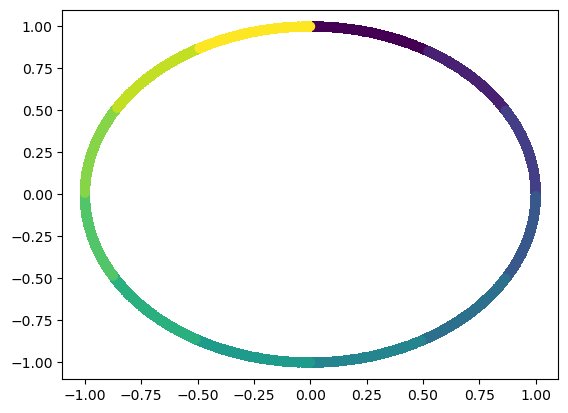

In [9]:
# scatter plot
import matplotlib.pyplot as plt
d = diarios[diarios.date.dt.year == 2020]
plt.scatter(d.sen_ano, d.cos_ano, c=d.date.dt.month, cmap='viridis')
# same with month
# d = d[diarios.date.dt.month == 1]
# plt.scatter(d.sen_mes, d.cos_mes, c=d.date.dt.day, cmap='viridis')

# Exemplo em um concelho

## Cumulative events

In [10]:

# transform to cumulative events
cum_diarios = diarios.copy()
cum_diarios.set_index(["concelho", 'date'], inplace=True)
cum_diarios.drop(["distrito"], axis=1, inplace=True)
eventos.set_index(["concelho", 'data_do_incidente'], inplace=True)
cum_diarios

t_med  t_max  t_min  dd_med  dd_ffx  ff_med  ff_max  \
concelho date                                                              
ALMADA   2018-01-01    8.8   17.8    2.7  273.50   292.5   1.700   6.725   
         2018-01-02   10.7   17.4    2.6  278.25   289.5   2.000   7.800   
         2018-01-03   14.7   17.5   10.2  291.25   320.5   2.050   6.200   
         2018-01-04   15.0   20.3   12.9  255.25   244.5   2.625   7.450   
         2018-01-05   12.8   15.7    9.5  245.25   194.0   3.575  11.200   
...                    ...    ...    ...     ...     ...     ...     ...   
RESENDE  2023-12-27    7.3   12.6    2.8  133.00    90.0   2.600   5.700   
         2023-12-28    8.8   10.7    7.2  202.00   208.0   2.300   5.500   
         2023-12-29    9.3   11.9    7.9  157.00   231.0   1.400   3.700   
         2023-12-30    9.0    9.7    7.6  191.00   219.0   2.600   8.300   
         2023-12-31    7.4   10.4    5.2  277.00   214.0   3.700  10.900   

                     pr_qtd  dd_med_sin  dd_med_cos  ...  percentagem_zonaa  \
concelho date                                        ...                      
ALMADA   2018-01-01     0.1   -0.180445   -0.983585  ...           0.569832   
         2018-01-02     0.0    0.976104   -0.217303  ...           0.569832   
         2018-01-03     0.0    0.794459   -0.607317  ...           0.569832   
         2018-01-04     0.4   -0.703986   -0.710213  ...           0.569832   
         2018-01-05    19.3    0.204324    0.978903  ...           0.569832   
...                     ...         ...         ...  ...                ...   
RESENDE  2023-12-27     0.2    0.868966    0.494872  ...           0.000000   
         2023-12-28     4.2    0.806418    0.591345  ...           0.000000   
         2023-12-29     5.9   -0.079549    0.996831  ...           0.000000   
         2023-12-30     3.6    0.594909   -0.803793  ...           0.000000   
         2023-12-31     4.5    0.514004    0.857788  ...           0.000000   

                     percentagem_zonab  percentagem_zonac  \
concelho date                                               
ALMADA   2018-01-01           0.351955           0.078212   
         2018-01-02           0.351955           0.078212   
         2018-01-03           0.351955           0.078212   
         2018-01-04           0.351955           0.078212   
         2018-01-05           0.351955           0.078212   
...                                ...                ...   
RESENDE  2023-12-27           0.000000           1.000000   
         2023-12-28           0.000000           1.000000   
         2023-12-29           0.000000           1.000000   
         2023-12-30           0.000000           1.000000   
         2023-12-31           0.000000           1.000000   

                     soma_degree_rede_concelho  n_subestacoes_concelho  \
concelho date                                                            
ALMADA   2018-01-01                       17.0                     7.0   
         2018-01-02                       17.0                     7.0   
         2018-01-03                       17.0                     7.0   
         2018-01-04                       17.0                     7.0   
         2018-01-05                       17.0                     7.0   
...                                        ...                     ...   
RESENDE  2023-12-27                        0.0                     0.0   
         2023-12-28                        0.0                     0.0   
         2023-12-29                        0.0                     0.0   
         2023-12-30                        0.0                     0.0   
         2023-12-31                        0.0                     0.0   

                     perc_prim  perc_sec  perc_terc  minheight  maxheight  
concelho date                                                              
ALMADA   2018-01-01   0.005225  0.136672   0.858103        0.0      125.0  
         2018-01-02

C:\Users\Plancha\AppData\Local\Temp\ipykernel_36416\2631813049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_lisboa["n_incidentes"] = 0
C:\Users\Plancha\AppData\Local\Temp\ipykernel_36416\2631813049.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_lisboa["n_incidentes_cum"] = cum_lisboa["n_incidentes"].cumsum()


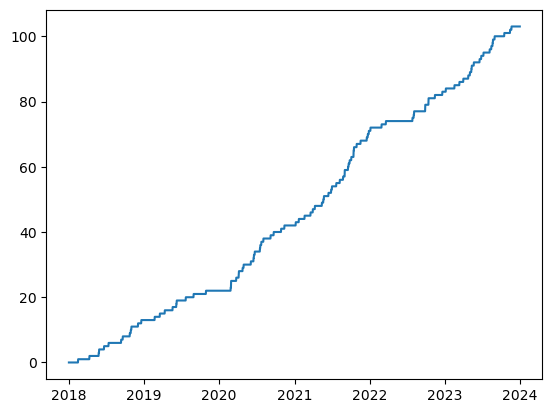

In [11]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# to exemplify pick up lisboa
cum_lisboa = cum_diarios.loc["LISBOA"]
cum_lisboa["n_incidentes"] = 0
# anterior = None
for evento in eventos.loc["LISBOA"].index:
  # if anterior == evento:
  #   print(evento)
  cum_lisboa.loc[evento, "n_incidentes"] += 1
  # anterior = evento
cum_lisboa["n_incidentes_cum"] = cum_lisboa["n_incidentes"].cumsum()
# plot
plt.plot(cum_lisboa.index, cum_lisboa.n_incidentes_cum)

C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


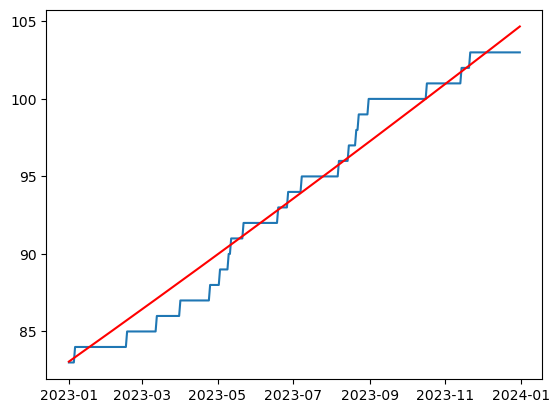

In [12]:
# split data
train = cum_lisboa[cum_lisboa.index.year < 2023]
test = cum_lisboa[cum_lisboa.index.year == 2023]

# fit model
model = AutoReg(train.n_incidentes_cum, lags=1)
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# plot
plt.plot(test.index, test.n_incidentes_cum)
plt.plot(test.index, predictions, color='red')
plt.show()

C:\Users\Plancha\AppData\Local\Temp\ipykernel_36416\2114820599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_incidentes_predicted"] = predictions
C:\Users\Plancha\AppData\Local\Temp\ipykernel_36416\2114820599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_incidentes_predicted"] = test["n_incidentes_predicted"].apply(np.round)


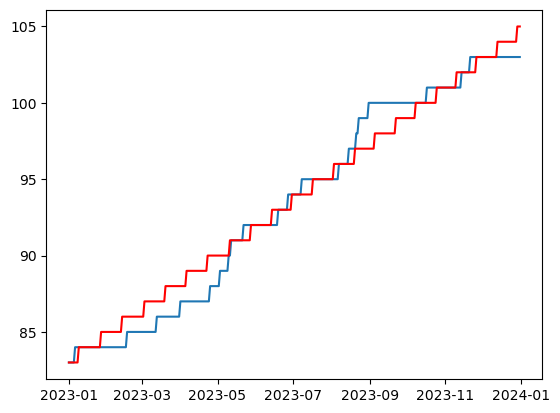

In [13]:
# decode into events
test["n_incidentes_predicted"] = predictions
# floor
test["n_incidentes_predicted"] = test["n_incidentes_predicted"].apply(np.round)
# plot
plt.plot(test.index, test.n_incidentes_cum)
plt.plot(test.index, test.n_incidentes_predicted, color='red')
plt.show()

## Distância

In [14]:
# metrica de distâncias diferentes agora que estamos a prefer os eventos entre concelhos
# vai dar mau com o que estamos a fazer mais parece mais justo para outras previsoesfrom networkx import Graph
from networkx import Graph
import grafo
vizinhos: Graph = grafo.G
from functools import cache
# type Concelho = str
# type Timestamp = datetime.datetime
@cache
def distance_between_events(event_real, event_predicted, peso=7) -> float: # event_real = (concelho, timestamp), event_predicted = (concelho, timestamp)
  concelho_distance = len(grafo.smallest_path(event_real[0], event_predicted[0])) - 1
  # if type(event_real[1]) is tuple and type(event_predicted[1]) is tuple:  
  #   # print(event_real[1], event_predicted[1])
  #   print(event_real, event_predicted)
  time_distance = abs((event_real[1] - event_predicted[1]).days)

  return peso*concelho_distance + 1*time_distance


## Links

In [15]:
from tqdm.notebook import tqdm
# now what's above but as a function
# isto é uma heuristica mas n sei cmo fazer se n for assim
# nao garante melhor otimizacao mas e bom o suficiente
def best_links(distance_funciton, real_events, predicted_events, d_matrix = None) -> tuple[list[tuple], np.array]:
  if d_matrix is None:
    d_matrix = calculate_dmatrix(real_events, predicted_events, distance_fn=distance_funciton)
  distances = d_matrix.flatten()
  # devolver indices
  distances = pd.DataFrame(distances, columns=["distance"])
  distances["indexes"] = [(i, j) for i in range(d_matrix.shape[0]) for j in range(d_matrix.shape[1])]
  distances.sort_values(by="distance")
  chosen_col = set() # check if set is faster or not
  chosen_row = set() # check if set is faster or not
  links = []
  for i, j in tqdm(distances["indexes"]):
    if not (i in chosen_row or j in chosen_col):
      links.append((i, j))
      chosen_col.add(j)
      chosen_row.add(i)
    if len(links) == min(d_matrix.shape):
      break
  for link in enumerate(links):
    # transform them to timestamps
    links[link[0]] = (real_events[link[1][0]], predicted_events[link[1][1]])
  return links, d_matrix

def calculate_dmatrix(real_events, predicted_events, distance_fn=distance_between_events) -> np.array:
  d_matrix = np.zeros((len(real_events), len(predicted_events)))
  for i, event_real in tqdm(list(enumerate(real_events))):
    for j, event_predicted in enumerate(predicted_events):
      d_matrix[i, j] = distance_fn(event_real, event_predicted)
  return d_matrix

## Metricas

In [16]:
from sklearn.metrics import f1_score, confusion_matrix

def calculate_delta(links,len_eventos_previstos,len_eventos_reais, punishing=10, distance_fn=distance_between_events):
  return sum([distance_fn(link[0], link[1]) for link in links]) + punishing*abs(len_eventos_previstos - len_eventos_reais)
def d_normal(l, prev, real): return calculate_delta(l, prev, real, 10)
def d_punishing(l, prev, real): return calculate_delta(l, prev, real, 100)
def calculate_f1_timeseries(eventos_previstos, eventos_reais, index: pd.MultiIndex):
  # range = pd.date_range(range[0], range[1])\
  df = pd.DataFrame(index=index)
  df["real"] = 0
  df["predicted"] = 0
  for evento in eventos_reais:
    df.loc[evento, "real"] += 1
  for evento in eventos_previstos:
    df.loc[evento, "predicted"] += 1
  # check where is NaN
  # print(df[df.isna().any(axis=1)])
  return f1_score(df["real"], df["predicted"]), confusion_matrix(df["real"], df["predicted"])


def calculate_f1_events(links, real_events_len, predicted_events_len, treshold=7, distance_fn=distance_between_events) -> float:
  distances = [distance_fn(link[0], link[1]) for link in links]
  tp = sum([1 for d in distances if d <= treshold])
  # false positives are real events without a link
  fp = real_events_len - tp
  # false negatives are predicted events without a link
  fn = predicted_events_len - tp
  return 2*tp/(2*tp + fp + fn)


* D normal deve ser a metrica principal de comparacao de modelos
* D punshing deve ser usada como segunda metrica de comparacao
* F1_ts deve ser usada para julgar a qualidade de previsao de eventos em termos de prever quando os events acontecem
* F1_events deve ser usada para julgar a qualidade de previsao de eventos em termos de prever quais os eventos que acontecem

# Assumir independência entre concelhos

## AR model

In [17]:
from tqdm.notebook import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
# agora vamos fazer o mesmo mas para todos os concelhos
# vamos fazer um loop
# real_events: list[tuple[Concelho, Timestamp]] = []
# predicted_events: list[tuple[Concelho, Timestamp]] = []
real_events = []
predicted_events = []
concelhos = cum_diarios.index.get_level_values(0).unique()
for concelho in tqdm(concelhos):
  cum_concelho = cum_diarios.loc[concelho]
  cum_concelho["n_incidentes"] = 0
  for evento in eventos.loc[concelho].index:
    cum_concelho.loc[evento, "n_incidentes"] += 1
  cum_concelho["n_incidentes_cum"] = cum_concelho["n_incidentes"].cumsum()
  # split data
  train = cum_concelho[cum_concelho.index.year < 2023]
  test = cum_concelho[cum_concelho.index.year == 2023]

  # fit model
  model = AutoReg(train.n_incidentes_cum, lags=1)
  model_fit = model.fit()
  # make prediction
  predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  # decode into events
  predictions = predictions.round()
  # make diff
  predictions_diff = predictions.diff()
  # add first value because diff removes it
  predictions_diff[0] = predictions[0] - train.n_incidentes[-1]
  real_events.extend([(concelho, t) for t in test[test.n_incidentes > 0].index])
  predicted_events.extend([(concelho, t) for t in predictions_diff[predictions_diff > 0].index])
len(real_events), len(predicted_events)

  0%|          | 0/256 [00:00<?, ?it/s]

(399, 640)

In [18]:
# calculate links
d_matrix = calculate_dmatrix(real_events, predicted_events, distance_fn=distance_between_events)
d_matrix

  0%|          | 0/399 [00:00<?, ?it/s]

array([[139., 110.,  52., ..., 237., 244., 251.],
       [187., 158., 100., ..., 285., 292., 299.],
       [190., 161., 103., ..., 288., 295., 302.],
       ...,
       [193., 164., 106., ..., 242., 249., 256.],
       [401., 372., 314., ..., 373., 387., 394.],
       [403., 374., 316., ..., 424., 431., 438.]])

In [19]:
links, _ = best_links(distance_between_events, real_events, predicted_events, d_matrix=d_matrix)
t = d_normal(links, len(predicted_events), len(real_events)), d_punishing(links, len(predicted_events), len(real_events)), calculate_f1_events(links, len(real_events), len(predicted_events)), calculate_f1_timeseries(predicted_events, real_events, cum_diarios[cum_diarios.index.get_level_values(1).year == 2023].index)

f"Normal: {t[0]}, Punishing: {t[1]}, F1_events: {t[2]}, F1_timeseries: {t[3][0]}"

  0%|          | 0/255360 [00:00<?, ?it/s]

'Normal: 79982, Punishing: 101672, F1_events: 0.0, F1_timeseries: 0.015399422521655439'

In [20]:
t[3][1]

array([[92409,   632],
       [  391,     8]], dtype=int64)

## Arima

In [21]:
# auto arima lisboa
from pmdarima.arima import auto_arima
find_best_model = False
if find_best_model:
  cum_concelho = cum_diarios.loc["LISBOA"]
  cum_concelho["n_incidentes"] = 0
  for evento in eventos.loc["LISBOA"].index:
    cum_concelho.loc[evento, "n_incidentes"] += 1
  cum_concelho["n_incidentes_cum"] = cum_concelho["n_incidentes"].cumsum()
  # split data
  train = cum_concelho[cum_concelho.index.year < 2023]
  test = cum_concelho[cum_concelho.index.year == 2023]
  # fit model
  model_fit = auto_arima(
    y=train.n_incidentes_cum, 
    X=train.drop_constant_columns().drop(["n_incidentes_cum", "n_incidentes"], axis=1),
    seasonal=True, m=12, stepwise=True,
  )
  # make prediction
  predictions = model_fit.predict(n_periods=len(test), X=test.drop_constant_columns().drop(["n_incidentes_cum", "n_incidentes"], axis=1))
  predictions_r = predictions.round()
  # decode into events
  predictions_diff = predictions_r.diff()
  # add first value because diff removes it
  predictions_diff[0] = predictions_r[0] - train.n_incidentes[-1]
  # print parameters
  model_fit.summary()
  ## 
  ## SARIMAX(2,1,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 179.713
Date:                Tue, 28 May 2024   AIC                           -319.426
Time:                        22:05:37   BIC                           -209.240
Sample:                    01-01-2018   HQIC                          -278.781
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0445      0.017      2.630      0.009       0.011       0.078
t_med         -0.0082      0.012     -0.691      0.490      -0.032       0.015
t_max          0.0041      0.005      0.742      0.458      -0.007       0.015
t_min          0.0077      0.007      1.046      0.296      -0.007       0.022
dd_med     -3.142e-05   4.42e-05     -0.710      0.478      -0.000    5.53e-05
dd_ffx         0.0001   5.54e-05      2.116      0.034    8.63e-06       0.000
ff_med         0.0029      0.010      0.286      0.775      -0.017       0.023
ff_max        -0.0021      0.003     -0.611      0.541      -0.009       0.005
pr_qtd         0.0003      0.001      0.213      0.831      -0.002       0.003
dd_med_sin    -0.0099      0.005     -1.871      0.061      -0.020       0.000
dd_med_cos     0.0017      0.006      0.263      0.793      -0.011       0.014
dd_ffx_sin    -0.0047      0.007     -0.657      0.511      -0.019       0.009
dd_ffx_cos     0.0132      0.007      1.774      0.076      -0.001       0.028
sen_ano       -0.5984      0.542     -1.104      0.270      -1.661       0.464
cos_ano        0.4762      0.484      0.984      0.325      -0.472       1.425
sen_mes        0.0008      0.038      0.020      0.984      -0.073       0.075
cos_mes        0.0831      0.047      1.780      0.075      -0.008       0.175
ar.L1         -0.0323      0.057     -0.563      0.573      -0.145       0.080
ar.L2          0.0532      0.017      3.120      0.002       0.020       0.087
sigma2         0.0481      0.001     33.961      0.000       0.045       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             61677.75
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             4.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
pd.Series(predictions_r, index=test.index) if find_best_model else 0

date
2023-01-01     83.0
2023-01-02     83.0
2023-01-03     83.0
2023-01-04     83.0
2023-01-05     83.0
              ...  
2023-12-27     99.0
2023-12-28     99.0
2023-12-29     99.0
2023-12-30    100.0
2023-12-31    100.0
Length: 365, dtype: float64

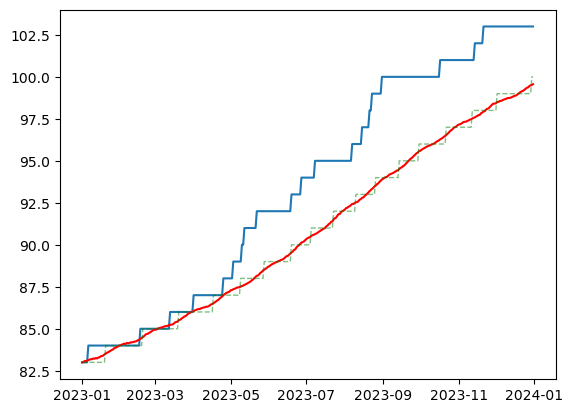

In [32]:
# transform to days
if find_best_model:
  pred = pd.Series(predictions, index=test.index)
  pred_r = pd.Series(predictions_r, index=test.index)
  # plot
  plt.plot(test.index, test.n_incidentes_cum)
  plt.plot(test.index, pred, color='red')
  plt.plot(test.index, pred_r, color='green', linestyle='dashed', linewidth=1, alpha=0.5)
  plt.show()

In [45]:
from pmdarima.arima import ARIMA
from tqdm.notebook import tqdm
# agora vamos fazer o mesmo mas para todos os concelhos
# vamos fazer um loop
# real_events: list[tuple[Concelho, Timestamp]] = []
# predicted_events: list[tuple[Concelho, Timestamp]] = []
real_events = []
predicted_events = []
concelhos = cum_diarios.index.get_level_values(0).unique()
for concelho in tqdm(sorted(list(concelhos))):
  print(concelho)
  cum_concelho = cum_diarios.loc[concelho]
  cum_concelho["n_incidentes"] = 0
  for evento in eventos.loc[concelho].index:
    cum_concelho.loc[evento, "n_incidentes"] += 1
  cum_concelho["n_incidentes_cum"] = cum_concelho["n_incidentes"].cumsum()
  # split data
  train = cum_concelho[cum_concelho.index.year < 2023]
  test = cum_concelho[cum_concelho.index.year == 2023]
  # fit model
  model_fit = ARIMA(order=(2, 1, 0))
  model_fit.fit(train.n_incidentes_cum, X=train.drop_constant_columns().drop(["n_incidentes_cum", "n_incidentes"], axis=1, errors='ignore'))
  # make prediction
  predictions = model_fit.predict(n_periods=len(test), X=test.drop_constant_columns().drop(["n_incidentes_cum", "n_incidentes"], axis=1, errors='ignore'))
  predictions_r = predictions.round()
  # decode into events
  predictions_diff = predictions_r.diff()
  # add first value because diff removes it
  predictions_diff[0] = predictions_r[0] - train.n_incidentes_cum[-1]
  real_events.extend([(concelho, t) for t in test[test.n_incidentes > 0].index])
  predicted_events.extend([(concelho, t) for t in predictions_diff[predictions_diff > 0].index])
len(real_events), len(predicted_events)

  0%|          | 0/256 [00:00<?, ?it/s]

ABRANTES
AGUEDA
AGUIARDABEIRA
ALANDROAL
ALBERGARIAAVELHA
ALBUFEIRA
ALCACERDOSAL
ALCANENA
ALCOBACA
ALCOCHETE
ALENQUER
ALIJO
ALJEZUR
ALJUSTREL
ALMADA
ALMEIDA
ALMEIRIM
ALMODOVAR
ALPIARCA
ALTERDOCHAO
ALVAIAZERE
ALVITO
AMADORA
AMARANTE
AMARES
ANADIA
ANSIAO
ARCOSDEVALDEVEZ
ARGANIL
AROUCA
ARRAIOLOS
ARRONCHES
AVEIRO
AVIS
AZAMBUJA
BAIAO
BARCELOS
BARRANCOS
BARREIRO
BATALHA
BEJA
BELMONTE
BENAVENTE
BOMBARRAL
BORBA
BOTICAS
BRAGA
BRAGANCA
CABECEIRASDEBASTO
CADAVAL
CALDASDARAINHA
CAMINHA
CANTANHEDE
CARRAZEDADEANSIAES
CARREGALDOSAL
CARTAXO
CASCAIS
CASTANHEIRADEPERA
CASTELOBRANCO
CASTRODAIRE
CASTROMARIM
CASTROVERDE
CELORICODABEIRA
CELORICODEBASTO
CHAMUSCA
CHAVES
CINFAES
COIMBRA
CONDEIXAANOVA
CORUCHE
COVILHA
CRATO
CUBA
ELVAS
ENTRONCAMENTO
ESPINHO
ESPOSENDE
ESTARREJA
ESTREMOZ
EVORA
FAFE
FARO
FELGUEIRAS
FERREIRADOALENTEJO
FERREIRADOZEZERE
FIGUEIRADAFOZ
FIGUEIRADECASTELORODRIGO
FIGUEIRODOSVINHOS
FORNOSDEALGODRES
FRONTEIRA
FUNDAO
GAVIAO
GOIS
GOLEGA
GONDOMAR
GOUVEIA
GRANDOLA
GUARDA
GUIMARAES
IDANHAANOVA
ILHA

(399, 525)

In [51]:
# calculate links
d_matrix = calculate_dmatrix(real_events, predicted_events, distance_fn=distance_between_events)
d_matrix

  0%|          | 0/399 [00:00<?, ?it/s]

array([[ 39., 112., 190., ..., 342.,  67., 275.],
       [ 19.,  92., 170., ..., 322.,  65., 255.],
       [ 70.,   3.,  81., ..., 233., 154., 166.],
       ...,
       [282., 209., 131., ...,  21., 268.,  60.],
       [117., 190., 268., ..., 322.,  33., 241.],
       [289., 216., 138., ...,  28., 261.,  53.]])

In [52]:
links, _ = best_links(distance_between_events, real_events, predicted_events, d_matrix=d_matrix)
t = d_normal(links, len(predicted_events), len(real_events)), d_punishing(links, len(predicted_events), len(real_events)), calculate_f1_events(links, len(real_events), len(predicted_events)), calculate_f1_timeseries(predicted_events, real_events, cum_diarios[cum_diarios.index.get_level_values(1).year == 2023].index)

f"Normal: {t[0]}, Punishing: {t[1]}, F1_events: {t[2]}, F1_timeseries: {t[3][0]}"

  0%|          | 0/209475 [00:00<?, ?it/s]

'Normal: 69677, Punishing: 81017, F1_events: 0.0, F1_timeseries: 0.012987012987012988'

In [139]:
t[3][1] 

array([[89289,  3752],
       [  326,    73]], dtype=int64)

## LSTM


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [66]:
# so pra testar pegar lisboa
l = cum_diarios.loc["LISBOA"]
l = l.add_column("n_incidentes", 0)
for evento in eventos.loc["LISBOA"].index:
  l.loc[evento, "n_incidentes"] += 1
l["n_incidentes_cum"] = l["n_incidentes"].cumsum()
# split data
train = l[l.index.year < 2023]
test = l[l.index.year == 2023]

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(train.shape[0], 1)))
model.add(LSTM(50, activation='relu', ))
model.add(Dense(1))
# def loss_function(y_true, y_pred):
#   # transform to events
#   y_true = np.diff(y_true)
#   # pred is not rounded, so round first
#   y_pred = np.round(y_pred)
#   y_pred = np.diff(y_pred)
#   # link them
#   links = best_links(distance_between_events, y_true, y_pred)
#   # use d_normal
#   return d_normal(links, len(y_pred), len(y_true))
model.compile(optimizer='adam', loss="mse")
# fit model
model.fit(train.n_incidentes_cum, epochs=1000, verbose=0)
# make prediction
predictions = model.predict(test.n_incidentes_cum)
# decode into events
predictions_diff = np.diff(predictions)
# add first value because diff removes it
predictions_diff = np.insert(predictions_diff, 0, predictions[0] - train.n_incidentes_cum[-1])
real_events = [("LISBOA", t) for t in test[test.n_incidentes > 0].index]
predicted_events = [("LISBOA", t) for t in predictions_diff[predictions_diff > 0].index]
# calculate links
d_matrix = calculate_dmatrix(real_events, predicted_events, distance_fn=distance_between_events)
d_matrix


ValueError: None values not supported.

n conxigo

## InceptionTimePlus

Classificacao

In [70]:
import tsai
from tsai.basics import *
from tsai.inference import load_learner
load_learner

ImportError: cannot import name '_get_column_indices' from 'sklearn.utils' (C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\sklearn\utils\__init__.py)